In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.4. GEOID Clustering')
cur_date = "012623"

library(readxl)
library(tidyverse)
library(reshape2)
# library(Hmisc)
library(factoextra)

# reading in files
acs_whp_df = data.frame(read_excel("Input/Imputed_ACS_WHP_Data_010923.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# viewing data
head(acs_whp_df)

,GEO_ID,Census_Tract,County,Avg_ACRES,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Sex_Ratio,Median_Age,Population_Under_18,⋯,Less_than_High_School,High_School_Education,Some_College,College_Education,Employed,Employed_Male,Employed_Female,Full_Time_Work,Part_Time_Work,No_Work
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,278233.8,92.23704,1,81-100,87.2,37.3,21.9,⋯,40.7,30.1,21.1,0.9,13.9,9.9,17.7,5.4,32.1,28.1
2,14000US37001020200,202.00,Alamance,278233.8,92.23704,1,81-100,78.3,31.0,29.1,⋯,32.6,40.0,18.9,12.4,22.5,20.5,24.3,10.6,43.1,43.0
3,14000US37001020300,203.00,Alamance,278233.8,92.23704,1,81-100,77.8,40.7,27.1,⋯,37.3,5.9,22.6,4.6,10.3,6.0,14.4,3.9,27.5,32.7
4,14000US37001020400,204.00,Alamance,278233.8,92.23704,1,81-100,78.1,30.5,31.4,⋯,39.3,25.3,16.3,5.4,18.9,16.7,20.4,10.9,35.1,38.3
5,14000US37001020501,205.01,Alamance,278233.8,92.23704,1,81-100,92.7,35.1,23.3,⋯,6.1,14.9,3.5,1.5,5.4,1.3,9.7,1.5,24.0,14.5
6,14000US37001020502,205.02,Alamance,278233.8,92.23704,1,81-100,99.0,32.1,30.0,⋯,26.6,29.9,10.8,5.2,10.0,5.9,15.9,2.2,33.5,41.4


In [8]:
# extracting variables we're interested in
variables_of_interest = c("Population_Under_65", "Race_White", #"Race_Non_White", "Average_Income Deficit"
                          "Hispanic_Latino", #"Population_Under_5"
                          "Non_Proficient_English_Speakers","Poverty_Overall", "Total_Housing_Units", 
                          "College_Education", "Full_Time_Work")

# changing the df from a wide to long format 
longer_acs_whp_df = pivot_longer(acs_whp_df, cols = 8:45, names_to = "Variables", values_to = "Value") %>%
    filter(Variables %in% variables_of_interest)
head(longer_acs_whp_df)

GEO_ID,Census_Tract,County,Avg_ACRES,Wildfire_Hazard_Potential_Mean,Wildfire_Hazard_Potential_Quintile_Number,Wildfire_Hazard_Potential_Quintile_Percentage,Variables,Value
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
14000US37001020100,201,Alamance,278233.8,92.23704,1,81-100,Race_White,61.0
14000US37001020100,201,Alamance,278233.8,92.23704,1,81-100,Hispanic_Latino,9.5
14000US37001020100,201,Alamance,278233.8,92.23704,1,81-100,Non_Proficient_English_Speakers,3.9
14000US37001020100,201,Alamance,278233.8,92.23704,1,81-100,Poverty_Overall,27.2
14000US37001020100,201,Alamance,278233.8,92.23704,1,81-100,Total_Housing_Units,2036.0
14000US37001020100,201,Alamance,278233.8,92.23704,1,81-100,College_Education,0.9


In [9]:
# wide formatted df w/ sociodemographic variables and corresponding geo ids
id_variable_df = reshape2::dcast(longer_acs_whp_df, GEO_ID ~ Variables, value.var = "Value") %>% 
  column_to_rownames("GEO_ID")

head(id_variable_df)

,College_Education,Full_Time_Work,Hispanic_Latino,Non_Proficient_English_Speakers,Poverty_Overall,Race_White,Total_Housing_Units
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14000US37001020100,0.9,5.4,9.5,3.9,27.2,61.0,2036
14000US37001020200,12.4,10.6,28.4,16.0,33.2,51.9,1796
14000US37001020300,4.6,3.9,44.1,19.3,23.7,45.2,3033
14000US37001020400,5.4,10.9,21.0,10.1,31.8,19.6,2707
14000US37001020501,1.5,1.5,14.5,9.9,13.6,76.1,1670
14000US37001020502,5.2,2.2,23.5,13.2,24.4,40.7,1573


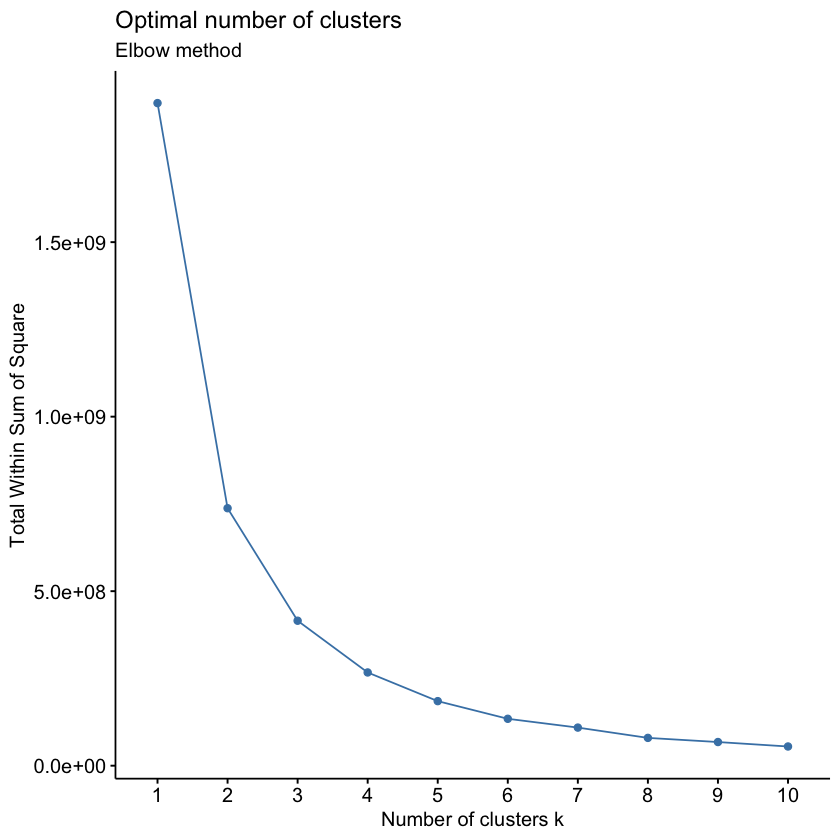

In [10]:
fviz_nbclust(id_variable_df, kmeans, method = "wss") +
  labs(subtitle = "Elbow method") # suggests 3

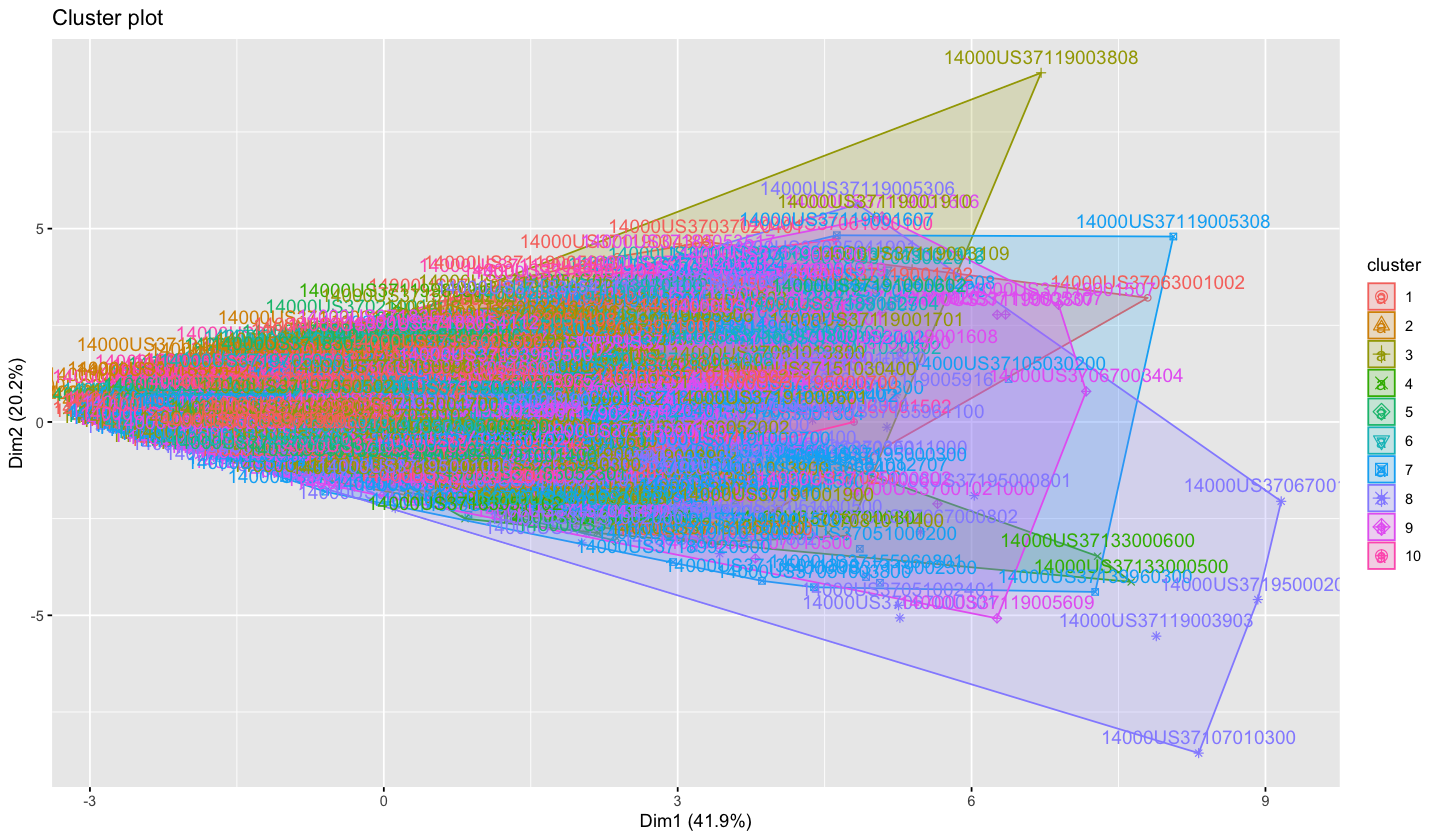

In [13]:
options(repr.plot.width=12, repr.plot.height=7) #changing size
geoids_kmeans = kmeans(id_variable_df, centers = 10, nstart = 25)
fviz_cluster(geoids_kmeans, data = id_variable_df) 